In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as pl

In [2]:
df = pd.read_csv('weather.csv')

# 1. Descriptive Statistics

In [3]:
mean_mt = df['MinTemp'].mean()
median_mt = df['MinTemp'].median()
sd_mt = df['MinTemp'].std()

In [4]:
print(f"Mean MinTemp: {mean_mt}")
print(f"Median MinTemp: {median_mt}")
print(f"Standard Deviation MinTemp: {sd_mt}")

Mean MinTemp: 7.265573770491804
Median MinTemp: 7.45
Standard Deviation MinTemp: 6.025799834253392


In [5]:
mean_max_temp = df['MaxTemp'].mean()
median_max_temp = df['MaxTemp'].median()
std_max_temp = df['MaxTemp'].std()

In [6]:
print(f"Mean MaxTemp: {mean_max_temp}")
print(f"Median MaxTemp: {median_max_temp}")
print(f"Standard Deviation MaxTemp: {std_max_temp}")

Mean MaxTemp: 20.550273224043714
Median MaxTemp: 19.65
Standard Deviation MaxTemp: 6.690515669598577


In [7]:
mean_rainfall = df['Rainfall'].mean()
median_rainfall = df['Rainfall'].median()
std_rainfall = df['Rainfall'].std()

In [8]:
print(f"Mean Rainfall: {mean_rainfall}")
print(f"Median Rainfall: {median_rainfall}")
print(f"Standard Deviation rainfall: {std_rainfall}")

Mean Rainfall: 1.428415300546448
Median Rainfall: 0.0
Standard Deviation rainfall: 4.225799585804051


In [9]:
mean_evaporation = df['Evaporation'].mean()
median_evaporation = df['Evaporation'].median()
sd_evaporation = df['Evaporation'].std()

In [10]:
print(f"Mean Evaporation: {mean_evaporation}")
print(f"Median Evaporation: {median_evaporation}")
print(f"Standard Deviation Evaporation: {sd_evaporation}")

Mean Evaporation: 4.521857923497268
Median Evaporation: 4.2
Standard Deviation Evaporation: 2.6693825342212643


# 2. Time Series Visualization

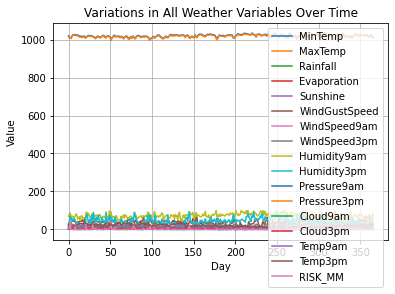

In [11]:
numeric_columns = df.select_dtypes(include="number")

# Create line chart for each numerical column
for col in numeric_columns:
    plt.plot(df.index, df[col], label=col)


plt.xlabel("Day")
plt.ylabel("Value")
plt.title("Variations in All Weather Variables Over Time")

plt.legend()

plt.grid(True)
plt.show()

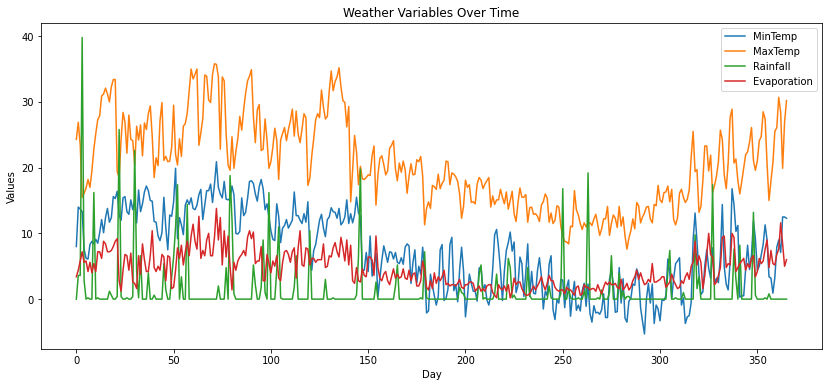

In [12]:
#Creating Line Chart for specific Weather Variables
plt.figure(figsize=(14, 6))
plt.plot(df['MinTemp'], label='MinTemp')
plt.plot(df['MaxTemp'], label='MaxTemp')
plt.plot(df['Rainfall'], label='Rainfall')
plt.plot(df['Evaporation'], label='Evaporation')
#We can replace the weather variables as required
plt.title('Weather Variables Over Time')
plt.xlabel('Day')
plt.ylabel('Values')
plt.legend()
plt.show()

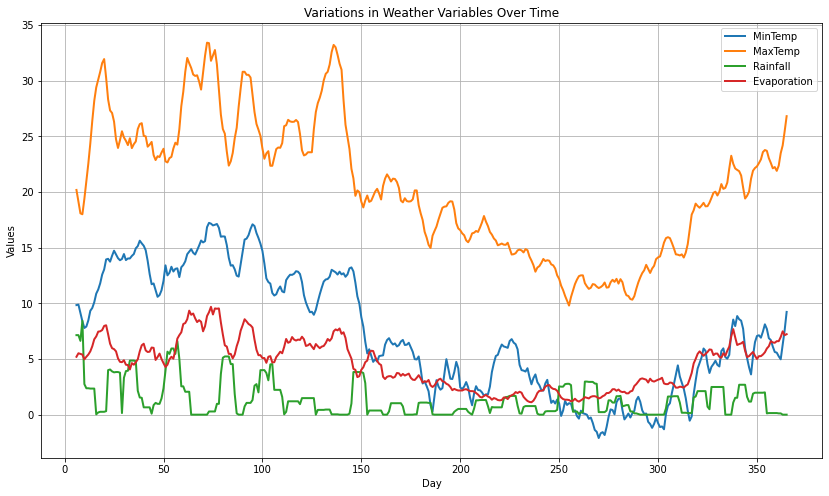

In [13]:
plt.figure(figsize=(14, 8))
window_size = 7
plt.plot(df['MinTemp'].rolling(window=window_size).mean(), label='MinTemp', linewidth=2)
plt.plot(df['MaxTemp'].rolling(window=window_size).mean(), label='MaxTemp', linewidth=2)
plt.plot(df['Rainfall'].rolling(window=window_size).mean(), label='Rainfall', linewidth=2)
plt.plot(df['Evaporation'].rolling(window=window_size).mean(), label='Evaporation', linewidth=2)

plt.title('Variations in Weather Variables Over Time')
plt.xlabel('Day')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# 3. Correlation Analysis

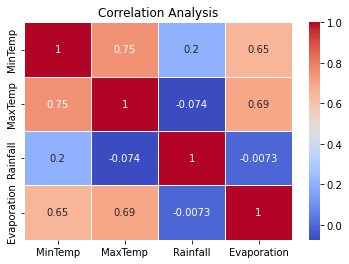

In [14]:
correlation = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']].corr()
sb.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Analysis')
plt.show()

# 4. Rainfall Distribution

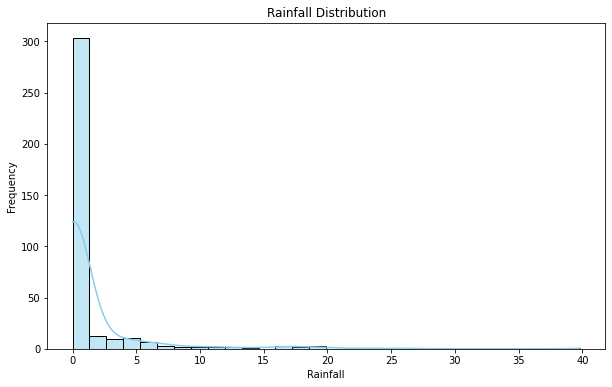

In [15]:
plt.figure(figsize=(10, 6))
sb.histplot(df['Rainfall'], kde=True, bins=30, color='skyblue')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

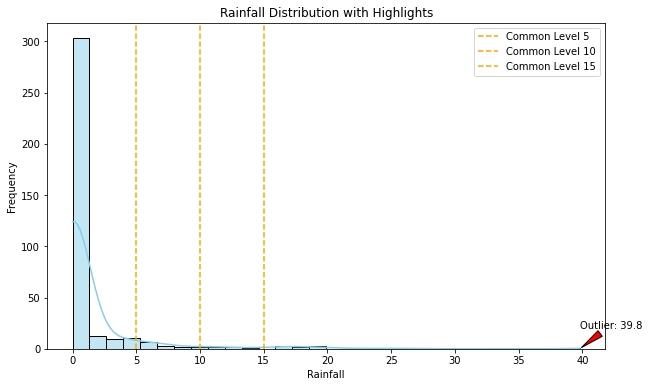

In [16]:
plt.figure(figsize=(10, 6))
sb.histplot(df['Rainfall'], kde=True, bins=30, color='skyblue')
plt.title('Rainfall Distribution with Highlights')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')

# Highlight common levels
common_levels = [5, 10, 15]  # We can add more values as needed
for level in common_levels:
    plt.axvline(x=level, color='orange', linestyle='--', label=f'Common Level {level}')

# Identify and annotate outliers
outlier_threshold = 30  
outliers = df[df['Rainfall'] > outlier_threshold]['Rainfall']
for outlier_value in outliers:
    plt.annotate(f'Outlier: {outlier_value}', xy=(outlier_value, 0), xytext=(outlier_value, 20),
                 arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7'))

plt.legend()
plt.show()

# 5. Seasonal Analysis

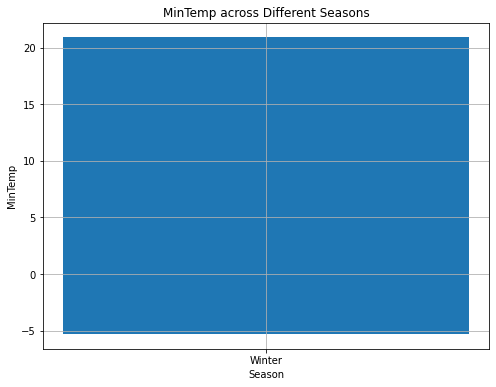

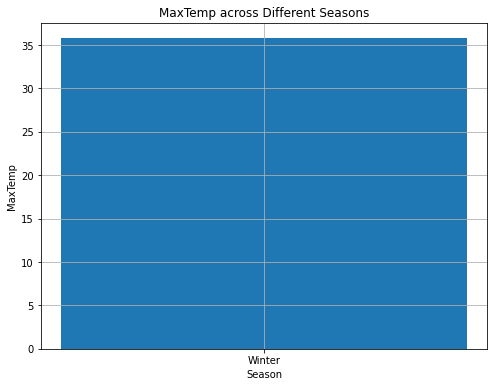

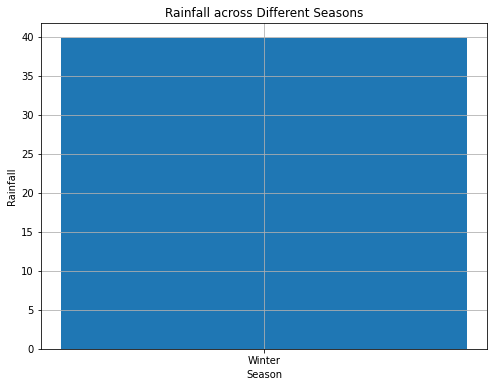

In [17]:
if not pd.api.types.is_datetime64_dtype(df.index):
    df.index = pd.to_datetime(df.index)

# Add a 'Season' column based on months (replacing 'Autumn' with 'Rain')
df["Season"] = df.index.month.map({
    0: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Rain", 10: "Rain", 11: "Rain"
})

# Create a bar graph for each variable across seasons
for col in ["MinTemp", "MaxTemp", "Rainfall"]:
    plt.figure(figsize=(8, 6))
    plt.bar(df["Season"], df[col])  # Use the original DataFrame without grouping
    plt.xlabel("Season")
    plt.ylabel(col)
    plt.title(f"{col} across Different Seasons")
    plt.grid(True)
    plt.show()

C:\Users\AMOL MORE\AppData\Local\Temp\ipykernel_10392\2911358905.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonal_data = df.groupby('Month').mean()


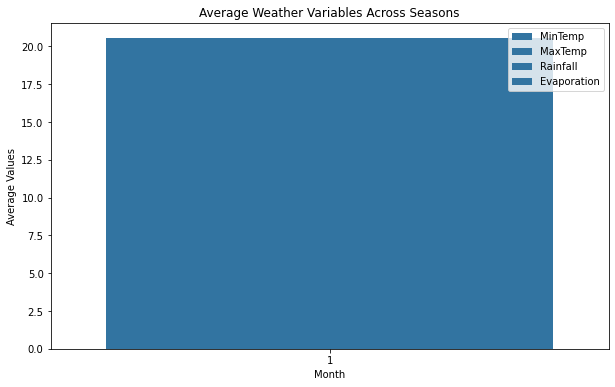

In [18]:
df['Month'] = df.index.month
seasonal_data = df.groupby('Month').mean()

plt.figure(figsize=(10, 6))
sb.barplot(x=seasonal_data.index, y=seasonal_data['MinTemp'], label='MinTemp')
sb.barplot(x=seasonal_data.index, y=seasonal_data['MaxTemp'], label='MaxTemp')
sb.barplot(x=seasonal_data.index, y=seasonal_data['Rainfall'], label='Rainfall')
sb.barplot(x=seasonal_data.index, y=seasonal_data['Evaporation'], label='Evaporation')
plt.title('Average Weather Variables Across Seasons')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.legend()
plt.show()

C:\Users\AMOL MORE\AppData\Local\Temp\ipykernel_10392\1275667102.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonal_data = df.groupby('Season').mean()


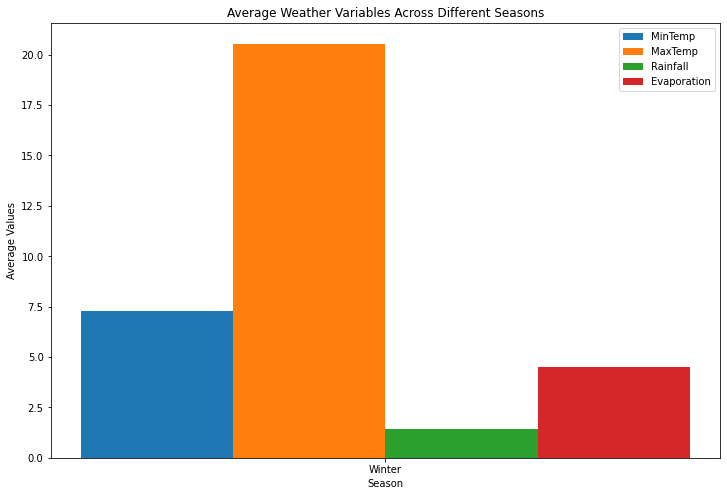

In [19]:
# Group by 'Season' and calculate average values
seasonal_data = df.groupby('Season').mean()

plt.figure(figsize=(12, 8))

bar_width = 0.2
index = list(range(len(seasonal_data)))

plt.bar([i - 1.5 * bar_width for i in index], seasonal_data['MinTemp'], width=bar_width, label='MinTemp')
plt.bar([i - 0.5 * bar_width for i in index], seasonal_data['MaxTemp'], width=bar_width, label='MaxTemp')
plt.bar([i + 0.5 * bar_width for i in index], seasonal_data['Rainfall'], width=bar_width, label='Rainfall')
plt.bar([i + 1.5 * bar_width for i in index], seasonal_data['Evaporation'], width=bar_width, label='Evaporation')

plt.title('Average Weather Variables Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Average Values')
plt.xticks(index, seasonal_data.index)
plt.legend()
plt.show()